Музичні композиції можуть бути представлені у вигляді векторів ознак, що описують темп, спектральні характеристики, ритмічні патерни та інші аудіометричні параметри. Стрімінгові сервіси потребують автоматичної класифікації музики для формування плейлистів та рекомендацій. Завданням є побудова моделі, яка класифікує музичні треки за жанрами на основі їхніх ознак.

In [1]:
import random


def genrand(n, i, j):
    rand_ints = random.sample(range(i, j + 1), n)
    return sorted(rand_ints)

Синтезуємо дані: 500 екземплярів, три центри. Дані задаються двовимірними векторами. 

Згенеровані центри:
[[6, 10], [2, 8], [0, 1]]


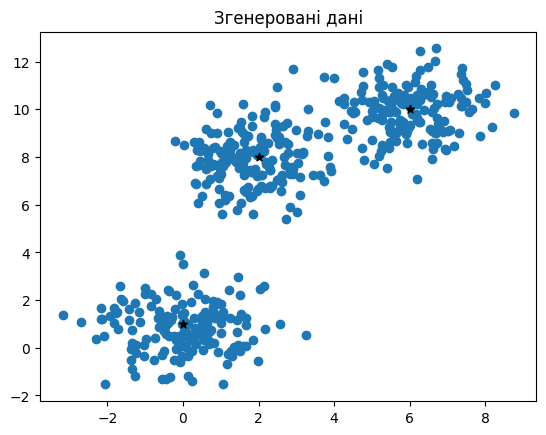

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

min, max = 0, 10
centers = [genrand(2, min, max) for _ in range(3)]
data, _ = make_blobs(
    n_samples=500, centers=centers, random_state=random.randint(0, 1000)
)

print("Згенеровані центри:")
print(centers)

plt.scatter(data[:, 0], data[:, 1])
plt.title("Згенеровані дані")
for idx, coord in enumerate(centers):
    plt.scatter(*coord, marker="*", color="black")
plt.show()

Далі застосую алгоритм нечіткої кластеризації fuzzy.cmeans. Вказую кількість кластерів – 3, отримую розподіл і візуалізую здійснену кластеризацію. Також окремо візуалізую центри кластерів чорними зірочками.

Знайдені центри:
[[0.03211933 0.76417433]
 [5.91028852 9.92741544]
 [1.76889624 7.80242701]]


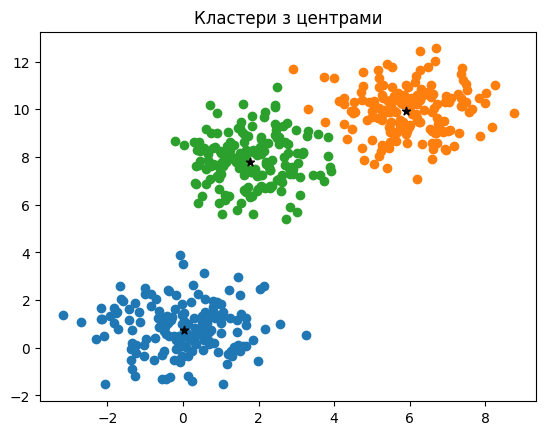

In [3]:
center, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data.T, 3, 3, error=0.005, maxiter=100
)
fuzzy_labels = np.argmax(u, axis=0)

for i in range(3):
    cluster_points = data[fuzzy_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1])
print("Знайдені центри:")
print(center)

plt.scatter(center[:, 0], center[:, 1], marker="*", color="black")
plt.title("Кластери з центрами")
plt.show()

Далі виводимо графік зміни значень цільової функції

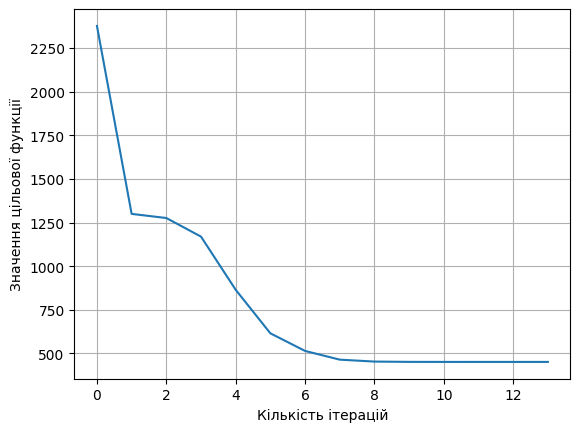

In [4]:
plt.plot(jm)
plt.xlabel("Кількість ітерацій")
plt.ylabel("Значення цільової функції")
plt.grid(True)
plt.show()